In [1]:
import networkx as nx
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
plt.style.use('ggplot')

# Bipartite projections

Parts of this notebooks are based on or inspired by [Eric Ma](https://ericmjl.github.io/)'s code from his amazing course:

https://campus.datacamp.com/courses/intermediate-network-analysis-in-python/

## Create a dataset

In [2]:
students = list(range(100))
forums = list(range(7))

In [5]:
# Create dates
dates = pd.date_range('2020-01-01', '2020-12-01', freq = 'd')

In [14]:
rows = []

for date in dates:
    rows.append((
        np.random.choice(students),
        np.random.choice(forums),
        date
    ))

In [15]:
data = pd.DataFrame(rows, columns = ['student', 'forum', 'date'])

In [16]:
data.head()

,student,forum,date
0,33,0,2020-01-01
1,26,0,2020-01-02
2,80,5,2020-01-03
3,99,6,2020-01-04
4,75,3,2020-01-05


## Create a graph

In [17]:
# Instantiate a new Graph: G
G = nx.Graph()

In [18]:
# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

## Compute projection and centrality

In [38]:
# Get the partitioned nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='forum']

# Create projected graphs
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

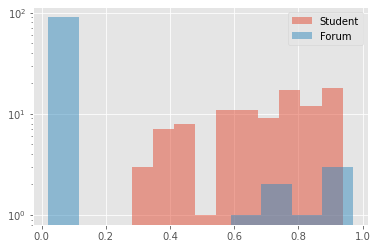

In [40]:
# Calculate the degree centrality using nx.degree_centrality: dcs
dcs_stdnt = nx.degree_centrality(G_students)
dcs_forum = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs_stdnt.values()), alpha=.5, label='Student')
plt.hist(list(dcs_forum.values()), alpha=.5, label='Forum')
plt.yscale('log') 
plt.legend()
plt.show()  